# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api= weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={api}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_request = requests.get(city_url)
        city_weather = city_weather_request.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity =city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country =city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | lashio
Processing Record 5 of Set 1 | nishinoomote
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | ngorongoro
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | turuntayevo
Processing Record 12 of Set 1 | moab
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | yasuj
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | kaoma
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | puerto armuelles
Processing Record

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()


City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.99,70,35,4.41,SH,1734335112
1,whitehorse,60.7161,-135.0538,-12.57,84,75,6.71,CA,1734334533
2,waitangi,-43.9535,-176.5597,16.57,96,100,1.79,NZ,1734335114
3,lashio,22.9333,97.7500,25.05,46,0,1.39,MM,1734335115
4,nishinoomote,30.7333,131.0000,12.31,66,75,5.14,JP,1734335116


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.99,70,35,4.41,SH,1734335112
1,whitehorse,60.7161,-135.0538,-12.57,84,75,6.71,CA,1734334533
2,waitangi,-43.9535,-176.5597,16.57,96,100,1.79,NZ,1734335114
3,lashio,22.9333,97.7500,25.05,46,0,1.39,MM,1734335115
4,nishinoomote,30.7333,131.0000,12.31,66,75,5.14,JP,1734335116


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

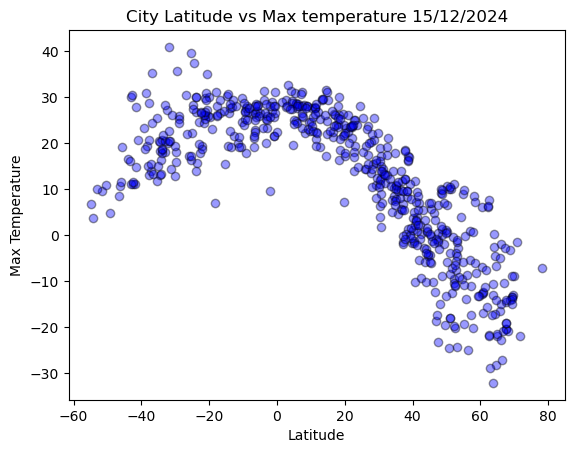

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], color = "blue", alpha=.4, edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
tm =time.strftime("%d/%m/%Y")
plt.title(f"City Latitude vs Max temperature {tm}" )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

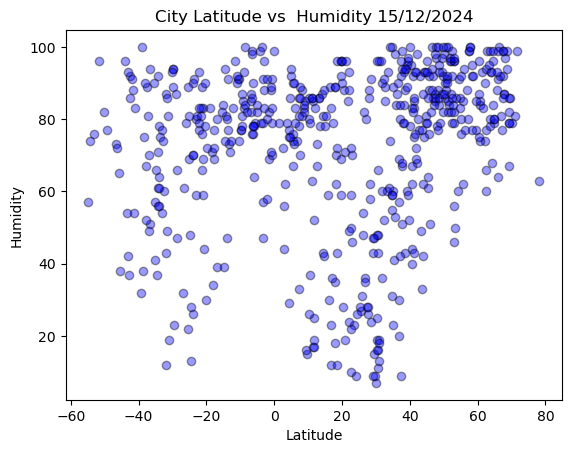

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], color = "blue", alpha=.4, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title(f"City Latitude vs  Humidity {tm}" )
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

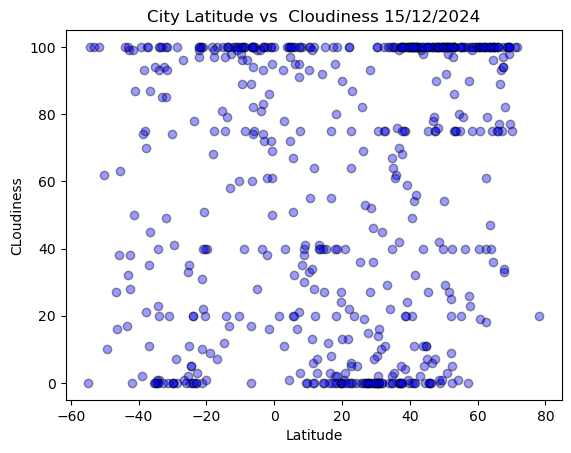

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], color = "blue", alpha=.4, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs  Cloudiness {tm}" )
plt.xlabel("Latitude")
plt.ylabel("CLoudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

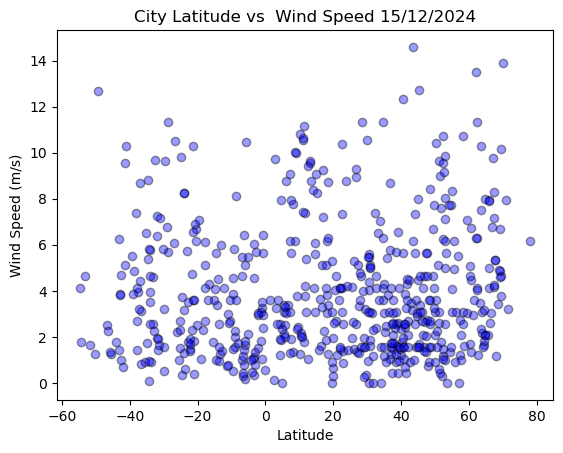

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], color = "blue", alpha=.4, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs  Wind Speed {tm}" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#linear regressive plot
def lrp(x,y,xl,yl):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    #regressive value
    regress_value= x * slope + intercept
    #line equation
    line = f"y= {round(slope,2)}x + {round(intercept,2)}"
    print(f"The r  value is:{rvalue}")

    plt.scatter(x,y, color = "blue", alpha=.4, edgecolors="black")
    plt.plot(x, regress_value, color="red")
    plt.title(f"City {xl} vs  {yl} {tm}" )
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title
    plt.annotate(line,(x.min(),y.min()),fontsize=15, color="red", weight= "bold")
    plt.show()





In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,-12.57,84,75,6.71,CA,1734334533
3,lashio,22.9333,97.7500,25.05,46,0,1.39,MM,1734335115
4,nishinoomote,30.7333,131.0000,12.31,66,75,5.14,JP,1734335116
5,ribeira grande,38.5167,-28.7000,17.22,88,75,3.09,PT,1734335117
6,georgetown,5.4112,100.3354,30.97,67,20,3.09,MY,1734335119


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.99,70,35,4.41,SH,1734335112
2,waitangi,-43.9535,-176.5597,16.57,96,100,1.79,NZ,1734335114
8,ngorongoro,-3.2397,35.4875,20.11,57,74,1.11,TZ,1734335121
9,ta`u,-14.2336,-169.5144,26.53,81,20,3.37,AS,1734335122
12,uturoa,-16.7333,-151.4333,26.59,80,100,4.28,PF,1734335125


###  Temperature vs. Latitude Linear Regression Plot

The r  value is:-0.8894508300104216


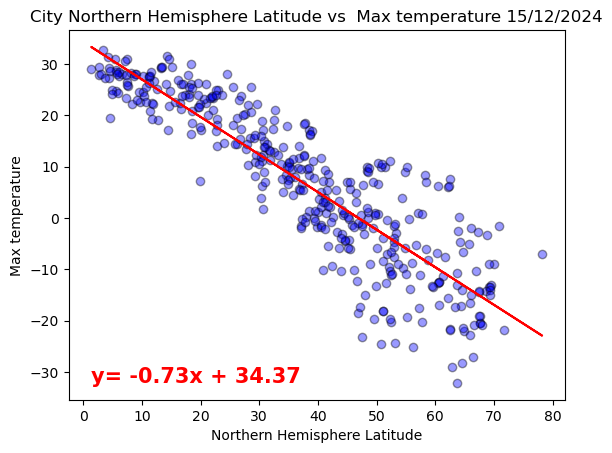

In [21]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Max Temp"]

lrp(x,y, "Northern Hemisphere Latitude","Max temperature")

The r  value is:0.49258752933462546


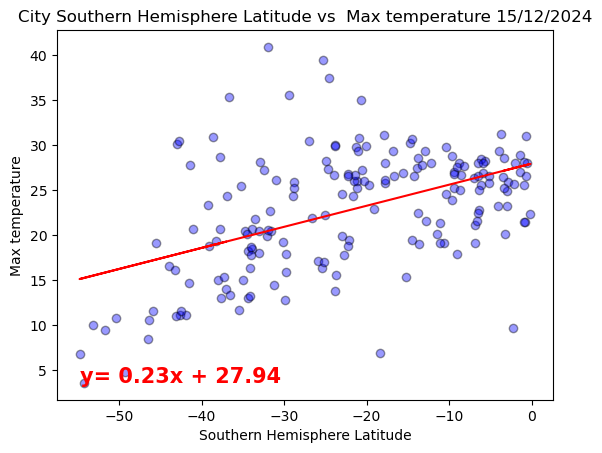

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Max Temp"]


lrp(x,y, "Southern Hemisphere Latitude","Max temperature")

**Discussion about the linear relationship:**
*  The Northern Hemisphere has strong negative linear correlation at -.84 between maximiun temperature and the northern hemisphere. Meaning that the higher the latitute in the northern Hemispere, the lower the max temparature is.
* The Southern Hemisphere has an above moderate positive correlation at .63 between maximiun temperature and the southern hemispere. Indicating that the higher the latiture in the southern hemispere, the higher the max temparature is.
* The closer the r value is to 1 or -1 indicates that strength of the linear corelation, wheter postive or negative .

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE


In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE